# Workshop -1 Adding Sunglasses to Your Passport Photo Using OpenCV #
# Name : S.HARIKA # 
# Reg No: 212224240155 #

Text(0.5, 1.0, 'face')

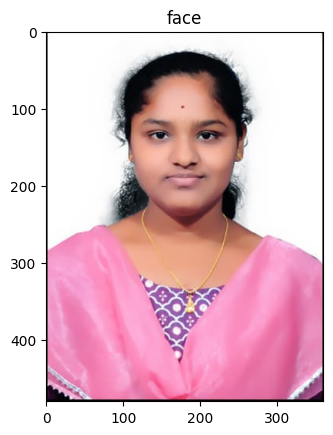

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the Face Image
faceimage=cv2.imread("Photo.jpg")
plt.imshow(faceimage[:,:,::-1]);plt.title("face")

In [2]:
faceimage.shape

(480, 360, 3)

In [3]:
#resized_faceImage.shape
faceimage.shape

(480, 360, 3)

Text(0.5, 1.0, 'GLASSPNG')

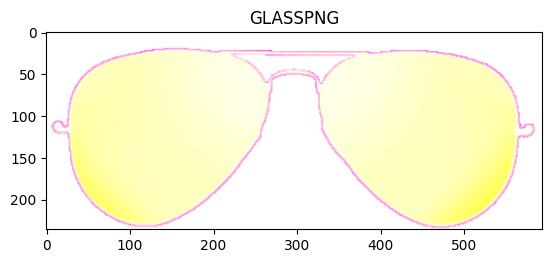

In [4]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glasspng=cv2.imread('sun.png',-1)
plt.imshow(glasspng[:,:,::-1]);plt.title("GLASSPNG")

In [5]:
# Resize the image to fit over the eye region
glasspng=cv2.resize(glasspng,(170,80))
print("image Dimension={}".format(glasspng.shape))

image Dimension=(80, 170, 4)


BGR shape: (236, 594, 3)
Alpha shape: (236, 594)


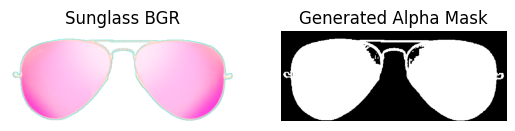

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load sunglasses (only BGR since no alpha channel exists in your file)
glasspng = cv2.imread("sun.png")

# Split BGR channels
b, g, r = cv2.split(glasspng)
glass_bgr = cv2.merge((b, g, r))

# Convert to grayscale to prepare alpha mask
gray = cv2.cvtColor(glasspng, cv2.COLOR_BGR2GRAY)

# Threshold to create alpha mask (tune threshold=240 depending on bg color)
_, glass_alpha = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

print("BGR shape:", glass_bgr.shape)
print("Alpha shape:", glass_alpha.shape)

# Show sunglasses BGR
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(glass_bgr, cv2.COLOR_BGR2RGB))
plt.title("Sunglass BGR")
plt.axis("off")

# Show generated alpha mask
plt.subplot(1,2,2)
plt.imshow(glass_alpha, cmap="gray")
plt.title("Generated Alpha Mask")
plt.axis("off")

plt.show()


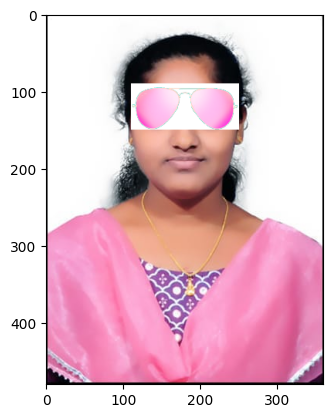

In [35]:
# Make a copy
#faceWithGlassesNaive = resized_faceImage.copy()
facewithglassesnaive=faceimage.copy()
# Replace the eye region with the sunglass image
facewithglassesnaive[90:150, 110:250]=glassbgr
plt.imshow(facewithglassesnaive[...,::-1])


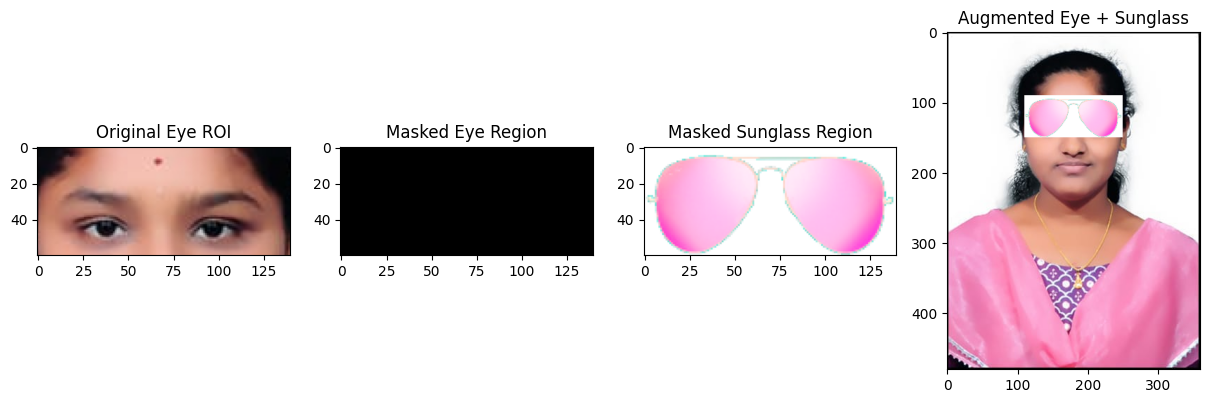

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Load images ----------------
faceimage = cv2.imread("Photo.jpg")   # your face image
glasspng  = cv2.imread("sun.png", cv2.IMREAD_UNCHANGED)  # sunglasses (with/without alpha)

if faceimage is None:
    raise FileNotFoundError("❌ Could not load faceimage.png")
if glasspng is None:
    raise FileNotFoundError("❌ Could not load sunglass.png")

# ---------------- Process sunglasses ----------------
if glasspng.shape[2] == 4:  # has alpha channel
    b, g, r, a = cv2.split(glasspng)
    glassbgr   = cv2.merge((b, g, r))   # sunglasses only
    glassmask1 = a                      # alpha channel
else:  # no alpha channel → make mask
    b, g, r = cv2.split(glasspng)
    glassbgr = cv2.merge((b, g, r))
    gray = cv2.cvtColor(glassbgr, cv2.COLOR_BGR2GRAY)
    _, glassmask1 = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# ---------------- Eye region coordinates ----------------
y1, y2 = 90, 150
x1, x2 = 110, 250

# Resize glasses + mask to fit ROI
glassbgr   = cv2.resize(glassbgr, (x2-x1, y2-y1))
glassmask1 = cv2.resize(glassmask1, (x2-x1, y2-y1))

# Make 3-channel mask for blending
glassmask   = cv2.merge((glassmask1, glassmask1, glassmask1))
glassmask   = glassmask.astype(float) / 255.0  # scale 0-1

# ---------------- Extract Eye ROI ----------------
eyeroi = faceimage[y1:y2, x1:x2].astype(float)

# ---------------- Masked regions ----------------
maskedeye   = (eyeroi * (1 - glassmask)).astype(np.uint8)
maskedglass = (glassbgr * glassmask).astype(np.uint8)

# ---------------- Final augmented region ----------------
eyeroifinal = cv2.add(maskedeye, maskedglass)

# Put it back into the face
face_with_glasses = faceimage.copy()
face_with_glasses[y1:y2, x1:x2] = eyeroifinal

# ---------------- Show results ----------------
plt.figure(figsize=(15,5))
plt.subplot(141); plt.imshow(eyeroi[...,::-1].astype(np.uint8)); plt.title("Original Eye ROI")
plt.subplot(142); plt.imshow(maskedeye[...,::-1]); plt.title("Masked Eye Region")
plt.subplot(143); plt.imshow(maskedglass[...,::-1]); plt.title("Masked Sunglass Region")
plt.subplot(144); plt.imshow(face_with_glasses[...,::-1]); plt.title("Augmented Eye + Sunglass")
plt.show()

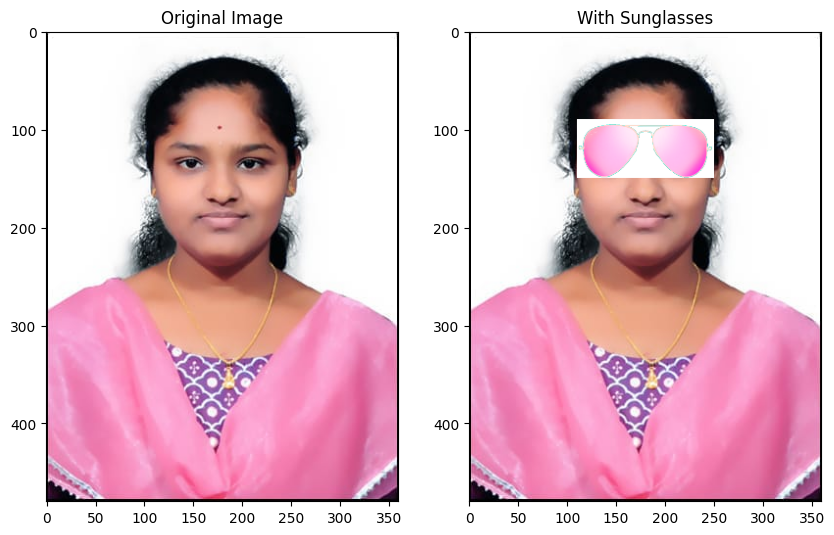

In [34]:
# Replace the eye ROI with the output from the previous section
facewithglassesarithmetic[90:150,110:250]=eyeroifinal

# Display the final result
plt.figure(figsize=[10,10]);
plt.subplot(121);plt.imshow(faceimage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(facewithglassesarithmetic[:,:,::-1]);plt.title("With Sunglasses");